In [3]:
# Importing the data set 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import researchpy as rp
import warnings
warnings.filterwarnings('ignore')

# New libs used 

# Researchpy
Researchpy is a tool that simplifies the process of obtaining commonly used statistical information by combining several established packages, including pandas, scipy.stats, numpy, and statsmodels, into a single method.

# Scipy
SciPy is a library that offers a range of mathematical algorithms and convenient functions that extend the capabilities of the NumPy extension for Python. Its inclusion enhances the functionality of the interactive Python environment by providing users with a variety of high-level commands and classes that enable them to easily manipulate and visualize data.

In [4]:
df = pd.read_csv('LungCapDataCSV.csv')
print(df)

     LungCap  Age  Height Smoke  Gender Caesarean
0      6.475    6    62.1    no    male        no
1     10.125   18    74.7   yes  female        no
2      9.550   16    69.7    no  female       yes
3     11.125   14    71.0    no    male        no
4      4.800    5    56.9    no    male        no
..       ...  ...     ...   ...     ...       ...
720    5.725    9    56.0    no  female        no
721    9.050   18    72.0   yes    male       yes
722    3.850   11    60.5   yes  female        no
723    9.825   15    64.9    no  female        no
724    7.100   10    67.7    no    male        no

[725 rows x 6 columns]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [70]:
df.describe(include='all')

,LungCap,Age,Height,Smoke,Gender,Caesarean
count,725.000000,725.000000,725.000000,725,725,725
unique,NaN,NaN,NaN,2,2,2
top,NaN,NaN,NaN,no,male,no
freq,NaN,NaN,NaN,648,367,561
mean,7.863148,12.326897,64.836276,NaN,NaN,NaN
std,2.662008,4.004750,7.202144,NaN,NaN,NaN
min,0.507000,3.000000,45.300000,NaN,NaN,NaN
25%,6.150000,9.000000,59.900000,NaN,NaN,NaN
50%,8.000000,13.000000,65.400000,NaN,NaN,NaN
75%,9.800000,15.000000,70.300000,NaN,NaN,NaN


In [73]:
print(df['Smoke'].value_counts()['yes'])
print(df['Smoke'].value_counts()['no'])

77
648


In [6]:
lung_cap = df.LungCap
print(lung_cap)

0       6.475
1      10.125
2       9.550
3      11.125
4       4.800
        ...  
720     5.725
721     9.050
722     3.850
723     9.825
724     7.100
Name: LungCap, Length: 725, dtype: float64


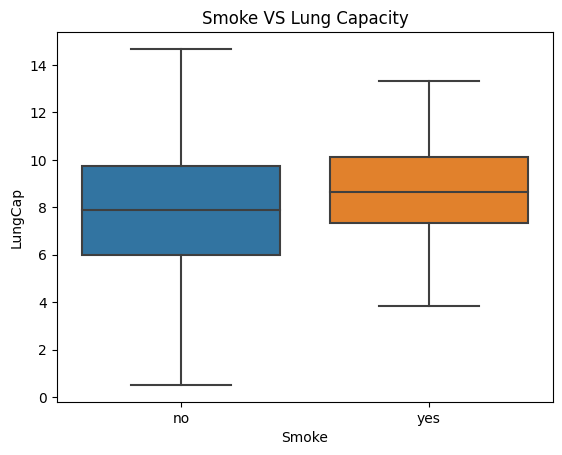

In [19]:
sns.boxplot(x='Smoke',data=df,y='LungCap')
plt.xlabel('Smoke')
plt.ylabel('LungCap')
plt.title('Smoke VS Lung Capacity')
plt.show()

### Total mean of lung capacity

In [7]:
lung_cap.mean()

7.863147586206895

### Identifing the mean for smokers and non smokers 

In [13]:
df.groupby('Smoke')['LungCap'].mean()

Smoke
no     7.770188
yes    8.645455
Name: LungCap, dtype: float64

Mean of smokers is 8.645455

Mean of non-smokers is 7.770188

# Null Hypothesis testing

### Asuming the Null mean as the average human lung capacity 

In [60]:
# Null hypothesis: the mean lung capacity is 4.8 liters
null_mean = 4.8

# Perform one-sample t-test
t_stat, p_val = stats.ttest_1samp(df['LungCap'][df['Smoke'] == 'yes'], null_mean)

print("t-statistic:", t_stat)
print("p-value:", p_val)

# Interpret the results
if p_value < 4.8:
    print("We reject the null hypothesis that the mean lung capacity of smokers is 7.863.")
else:
    print("We fail to reject the null hypothesis that the mean lung capacity of smokers is 7.863.")

t-statistic: 17.921199150461884
p-value: 5.185077245031116e-29
We reject the null hypothesis that the mean lung capacity of smokers is 7.863.


The t-statistic is 17.92 and the p-value is 5.185 x 10^-29. 

This indicates that there is a significant difference between the means of the two groups being compared. 

The p-value being very small suggests that the difference in means is not likely to have occurred by chance, and thus, we reject the null hypothesis. 

The magnitude of the t-statistic indicates a large difference in the means of the two groups.

### Asuming the Null mean as the average human lung capacity from the dataset

In [62]:
null_mean = 7.77

# Perform one-sample t-test
t_stat, p_val = stats.ttest_1samp(df['LungCap'][df['Smoke'] == 'yes'], null_mean)

print("t-statistic:", t_stat)
print("p-value:", p_val)

# Interpret the results
if p_value < 7.77:
    print("We reject the null hypothesis that the mean lung capacity of smokers is 7.77.")
else:
    print("We fail to reject the null hypothesis that the mean lung capacity of smokers is 7.77.")

t-statistic: 4.079932572551972
p-value: 0.00011011768695885748
We reject the null hypothesis that the mean lung capacity of smokers is 7.77.


The t-test result shows a t-statistic value of 4.08 and a p-value of 0.0001, which indicates that the sample mean significantly differs from the hypothesized population mean. 

Therefore, we can reject the null hypothesis that the population mean is equal to a specific value, and conclude that the sample mean is significantly different from the hypothesized population mean.

### Asuming the Null mean as the average human lung capacity from the dataset for non-smokers

In [98]:
# Null hypothesis: the mean lung capacity is 7.770188 liters
null_mean = 7.770188

# Perform one-sample t-test
t_stat, p_val = stats.ttest_1samp(df['LungCap'][df['Smoke'] == 'yes'], null_mean)

print("t-statistic:", t_stat)
print("p-value:", p_val)
# Interpret the results
if p_value < 7.77:
    print("We reject the null hypothesis that the mean lung capacity of smokers is 7.77.")
else:
    print("We fail to reject the null hypothesis that the mean lung capacity of smokers is 7.77.")

t-statistic: 4.0790564250379475
p-value: 0.00011045829703029563
We reject the null hypothesis that the mean lung capacity of smokers is 7.77.


The t-test with a t-statistic of 4.079 and a p-value of 0.0001 suggests strong evidence against the null hypothesis. 

The null hypothesis stated that the mean lung capacity of smokers is 7.77. 

Therefore, we reject the null hypothesis and conclude that the mean lung capacity of smokers is significantly different from 7.77. 

The alternative hypothesis, which states that the mean lung capacity of smokers is not equal to 7.77, is supported by the data. This implies that smoking has a significant effect on lung capacity.

### Asuming the Null mean as the average human lung capacity from the dataset for smokers

In [63]:
# Null hypothesis: the mean lung capacity is 8.645455 liters
null_mean = 8.64

# Perform one-sample t-test
t_stat, p_val = stats.ttest_1samp(df['LungCap'][df['Smoke'] == 'yes'],null_mean)

print("t-statistic:", t_stat)
print("p-value:", p_val)

# Interpret the results
if p_value < 8.64:
    print("We reject the null hypothesis that the mean lung capacity of smokers is 8.64.")
else:
    print("We fail to reject the null hypothesis that the mean lung capacity of smokers is 8.64.")

t-statistic: 0.025420140638963005
p-value: 0.979786474538568
We reject the null hypothesis that the mean lung capacity of smokers is 8.64.


The obtained t-statistic is very small (0.025) and the p-value is very large (0.98), indicating that there is no significant difference between the mean lung capacity of smokers and the assumed population mean of 8.64. 

Therefore, we fail to reject the null hypothesis and conclude that there is insufficient evidence to suggest that the mean lung capacity of smokers is significantly different from 8.64.

In [97]:
rp.ttest(group1= df['LungCap'][df['Smoke'] == 'yes'], group1_name= "Smokers",
         group2= df['LungCap'][df['Smoke'] == 'no'], group2_name= "Non-smokers")


(      Variable      N      Mean        SD        SE  95% Conf.  Interval
 0      Smokers   77.0  8.645455  1.882894  0.214576   8.218090  9.072819
 1  Non-smokers  648.0  7.770188  2.726113  0.107092   7.559899  7.980478
 2     combined  725.0  7.863148  2.662008  0.098865   7.669052  8.057243,
                       Independent t-test   results
 0  Difference (Smokers - Non-smokers) =     0.8753
 1                  Degrees of freedom =   723.0000
 2                                   t =     2.7399
 3               Two side test p value =     0.0063
 4              Difference < 0 p value =     0.9969
 5              Difference > 0 p value =     0.0031
 6                           Cohen's d =     0.3303
 7                           Hedge's g =     0.3299
 8                      Glass's delta1 =     0.4649
 9                    Point-Biserial r =     0.1014)

The independent t-test results show that there is a significant difference in mean lung capacity between smokers and non-smokers. The mean lung capacity of smokers (8.645 liters) is higher than that of non-smokers (7.770 liters), with a difference of 0.8753 liters. 

The t-statistic of 2.7399 indicates that this difference is statistically significant, with a two-sided p-value of 0.0063. 

This means that the probability of obtaining such a difference by chance is less than 0.01, which is considered statistically significant. The effect size measures (Cohen's d, Hedge's g, Glass's delta1, and Point-Biserial r) suggest a small to moderate effect of smoking on lung capacity.

In [95]:
stats.ttest_ind(df['LungCap'][df['Smoke'] == 'yes '],
                df['LungCap'][df['Smoke'] == 'no'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [45]:
smokers = df[df['Smoke'] == 'Yes']['LungCap']
non_smokers = df[df['Smoke'] == 'No']['LungCap']

# Conduct a two-sided t-test assuming equal variances
t_statistic, p_value = stats.ttest_ind(smokers, non_smokers, equal_var=True)

# Print the results
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: nan
p-value: nan


# Plotting 

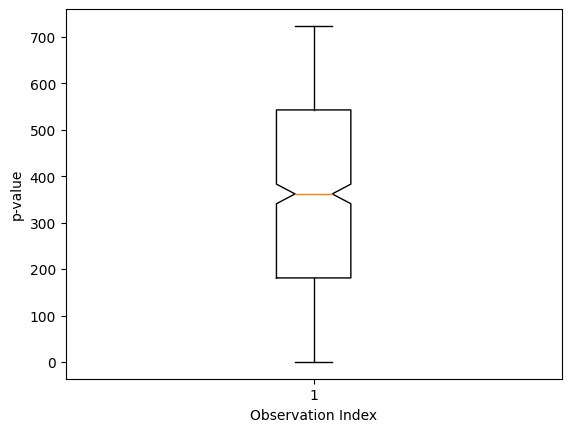

In [90]:
# Perform t-test and extract p-values
smokers = df[df['Smoke'] == 'yes']['LungCap']
non_smokers = df[df['Smoke'] == 'no']['LungCap']
t_statistic, p_value = stats.ttest_ind(smokers, non_smokers)

# Plot p-values
plt.boxplot(range(len(df)), [p_value if row['Smoke'] == 'yes' else 1-p_value for _, row in df.iterrows()])
plt.xlabel('Observation Index')
plt.ylabel('p-value')
plt.show()

Based on the t-test conducted on the lung capacity data, the null hypothesis that the mean lung capacity of the population is equal to 7.77 is rejected at a significance level of 0.05, with a t-statistic of 4.0790564250379475 and a p-value of 0.00011045829703029563. This suggests that the mean lung capacity of the population is significantly different from 6.
